In [1]:
import networkx as nx#复杂网络分析库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
xls = pd.ExcelFile(r'G:/CDO/知网研学/CNKI-analysis-master/dependence/知网数据.xls')#读取xls表格

In [3]:
readf = pd.read_excel(xls,'Sheet1')#读取第一个表

In [4]:
frame = readf[readf['共引文献'].notnull()]#如果关键词那一列非空，读取所有数据 

In [5]:
keywords = []#关键词列表，里面记录了所有的关键词，没有重复
for keyword in frame['共引文献']:#分隔关键词，并加入到列表中，去重
    if ',' in keyword:
        temp = keyword.split(',')
        for x in temp:
            if x not in keywords:
                keywords.append(x)
    elif ';' in keyword:
        temp = keyword.split(';')
        for x in temp:
            if x not in keywords:
                keywords.append(x)
    else:
        if keyword not in keywords:
            keywords.append(keyword)

In [6]:
df = pd.DataFrame(index=frame['序号'],columns=keywords)    #建立以标题为行，关键词为列的DataFrame矩阵
df.index.name='序号'
df.columns.name='共引文献' 

In [7]:
for row in frame['序号']:#将这一篇文献所拥有的关键词在矩阵中标记为1
    # print(row)
    for keyword in df.columns:
        if keyword in frame.loc[row]['共引文献']:
            #print(keyword)
            df.loc[row][keyword] = 1  

In [8]:
df = df.fillna(0)#填充空值 

In [9]:
data = df.values.T.dot(df.values)
#建立关键词之间的相关性，边的长度为相关性，在这里是将两个df点乘，df.values是按行读取值
#print(df.values)#这个时候data其实是关联度 

In [10]:
df2 = pd.DataFrame(data = data,index=keywords,columns=keywords)#建立关键词之间的相关性矩阵

value = lambda x : x * 30 if x > 0 else 0
df2 = df2.applymap(value)
# for i in range(0, len(df2.index)):
#     for j in range(0, len(df2.columns)):
#         if df2.iloc[i][j] < 4:#这里设置阈值
#             df2.iloc[i][j] = 0
print(df2) 

                                 ['基于区块链技术视角下未来财务会计发展方向研究'  \
['基于区块链技术视角下未来财务会计发展方向研究'                               30   
 '基于区块链理念探索“一带一路”区域的新零售模式'                              30   
 '收集个人信息的电子合同中格式条款与强制缔约的问题研究'                           30   
 '区块链智联世界:去中心化的信用中介2.0'                                 30   
 '我国互联网金融监管理论研究及现状分析'                                   30   
...                                                    ...   
 '基于结构方程模型的智慧社区购买意愿影响因素研究'                               0   
 '台湾智慧社区发展的最新实践'                                         0   
 '面向智慧城市的社区信息化管理研究'                                      0   
 '智慧社区运营管理体系及平台构建研究——基于利益相关者视角'                          0   
 '中国城市社区管理创新模式分析']                                       0   

                                  '基于区块链理念探索“一带一路”区域的新零售模式'  \
['基于区块链技术视角下未来财务会计发展方向研究'                                30   
 '基于区块链理念探索“一带一路”区域的新零售模式'                               60   
 '收集个人信息的电子合同中格式条款与强制缔约的问题研究'                            30   
 '区

In [11]:
net = nx.Graph(df2)#创建无向图，以关键词为节点，相关性为边 

In [12]:
de=dict(net.degree())#建立字典，关键字为索引，度（关联情况）为值
pos = nx.spring_layout(net)#四种建图模式，spectral,shell,circular,spring，spring是可以看的了
keywords = [i for i in keywords]#有边的关键词  

In [13]:
array = np.zeros(len(keywords))#建立以度为值的一维矩阵
j = 0#记录值的数量
for i in de.keys():
    array[j] = de[i]
    j+=1
arg = np.argsort(-np.array(array))
labels = {}#记录关键词
for index in range(0, len(keywords)):
    labels[keywords[arg[index]]] = keywords[arg[index]]  

In [14]:
de2 = [de[v]*10 for v in sorted(de.keys(), reverse=False)]#应该是节点的大小，尺寸调整合适  

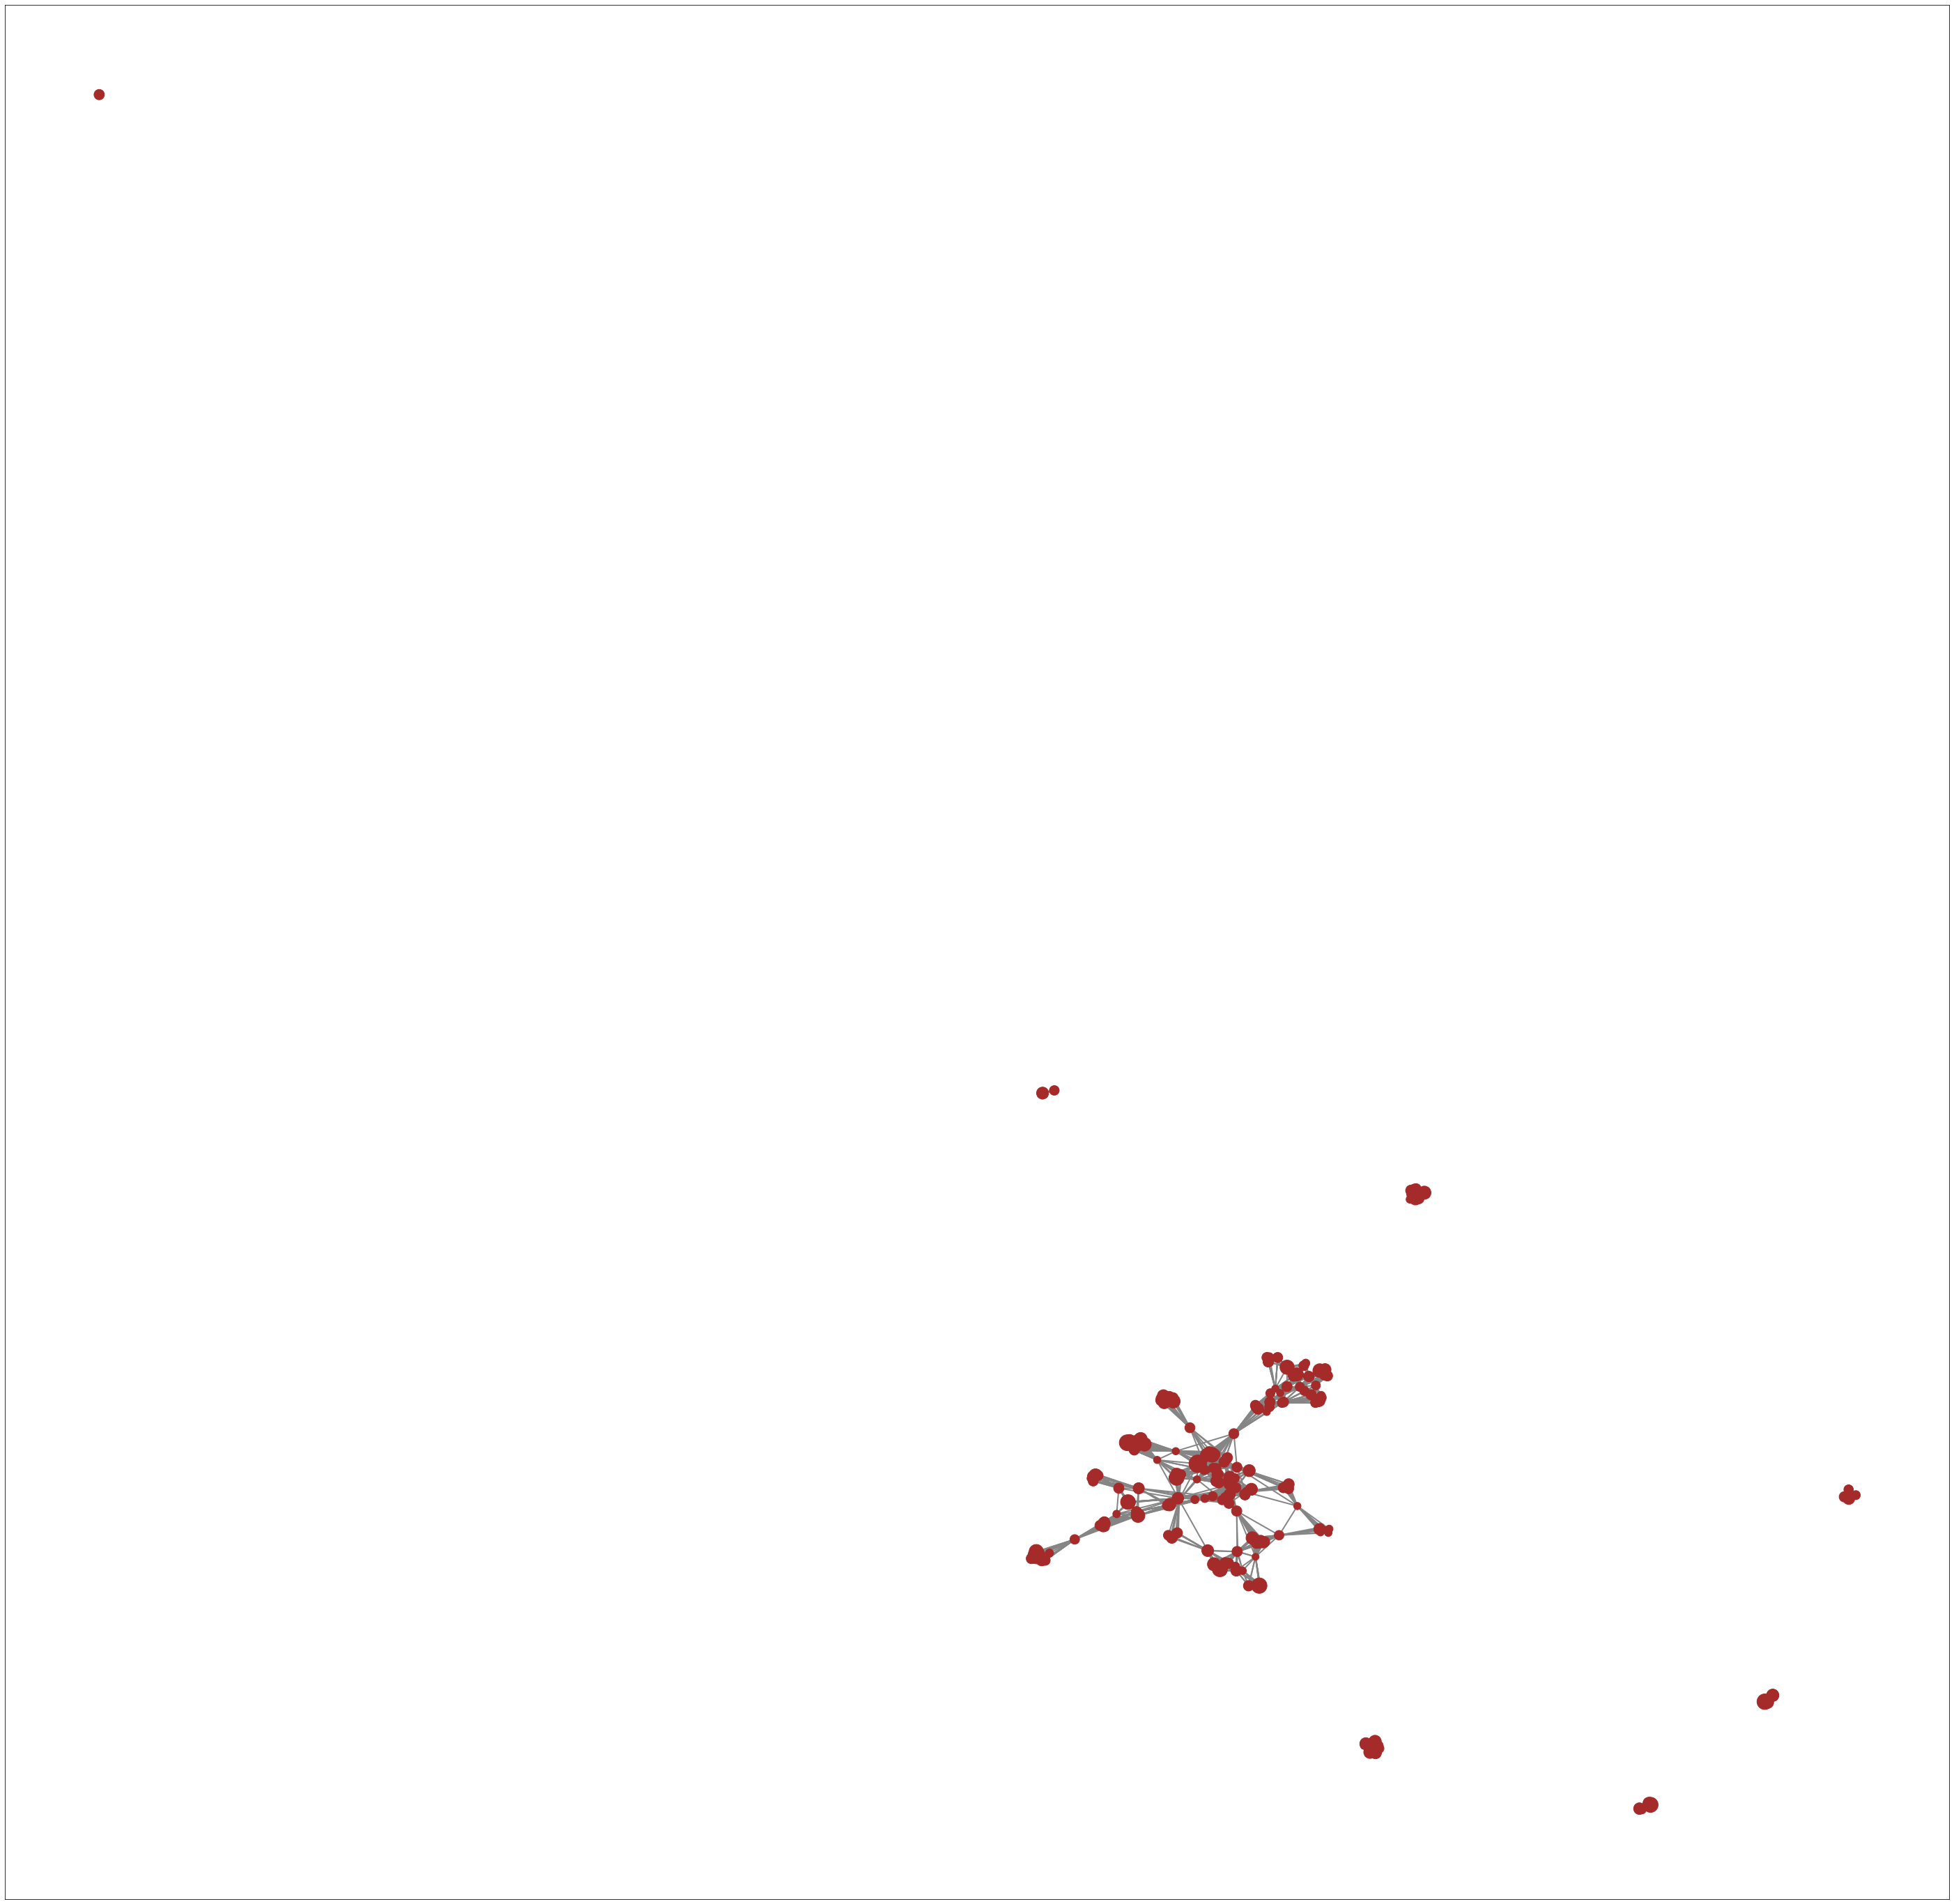

In [15]:
plt.figure(figsize=(50, 50))
#nx.draw_networkx_labels(net,pos,labels, font_size=40,font_color='black',font_family ='YouYuan')
nx.draw_networkx(net, pos, node_size=de2, with_labels = False, node_color='#A52A2A', linewidths=None, width=2.0, edge_color ='#858585')

In [17]:
import os
import networkx as nx#复杂网络分析库
import network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [19]:
path = os.path.abspath('G:/CDO/知网研学/CNKI-analysis-master/dependence/')
xls = pd.ExcelFile(path+'/知网数据.xls')#读取xls表格
readf = pd.read_excel(xls,'Sheet1')#读取第一个表
frame = readf[readf['共引文献'].notnull()]#如果关键词那一列非空，读取所有数据

keywords = network.seperate(frame, '共引文献', ' ', ';')
#关键词列表，里面记录了所有的关键词，没有重复
# for keyword in frame['共引文献']:#分隔关键词，并加入到列表中，去重
#     if ',' in keyword:
#         temp = keyword.split(',')
#         for x in temp:
#             if x not in keywords:
#                 keywords.append(x)
#     elif ';' in keyword:
#         temp = keyword.split(';')
#         for x in temp:
#             if x not in keywords:
#                 keywords.append(x)
#     else:
#         if keyword not in keywords:
#             keywords.append(keyword)

df = pd.DataFrame(index=frame['序号'],columns=keywords)    #建立以标题为行，关键词为列的DataFrame矩阵
df.index.name='序号'
df.columns.name='共引文献'
#
# #将这一篇文献所拥有的关键词在矩阵中标记为1
# for row in frame['序号']:
#     for keyword in df.columns:
#         if keyword in frame.loc[row]['共引文献']:
#             df.loc[row][keyword] = 1
# df = df.fillna(0)#填充空值

df = network.fill(frame, '序号', '共引文献', df)

#df为存在矩阵，dataframe类型
#data为关联度，矩阵类型
#df2位关联度矩阵，dataframe类型

data = df.values.T.dot(df.values)#建立关键词之间的相关性，边的长度为相关性，在这里是将两个df点乘，df.values是按行读取值
df2 = pd.DataFrame(data = data,index=keywords,columns=keywords)#建立关键词之间的相关性矩阵，以关联度作为值传入

#设置阈值
value = lambda x : x * 30 if x > 0 else 0
df2 = df2.applymap(value)

net = nx.Graph(df2)#创建无向图，以关键词为节点，相关性为边

dele, net = network.remove(keywords, net)

de=dict(net.degree())#建立字典，关键字为索引，度（关联情况）为值
pos = nx.spring_layout(net)#四种建图模式，spectral,shell,circular,spring，spring是可以看的了

array = np.zeros(len(keywords))#建立以度为值的一维矩阵
arg = np.argsort(-np.array(array))
labels = {}#记录关键词
for index in range(0, len(keywords)):
    labels[keywords[arg[index]]] = keywords[arg[index]]

de2 = [de[v]*10 for v in sorted(de.keys(), reverse=False)]#应该是节点的大小，尺寸调整合适

plt.figure(figsize=(50, 50))
nx.draw_networkx_labels(net,pos,labels, font_size=40,font_color='black',font_family ='YouYuan')#写标记
nx.draw_networkx(net, pos, node_size=de2, with_labels = False, node_color='#A52A2A', linewidths=None, width=2.0, edge_color ='#858585')

AttributeError: module 'network' has no attribute 'seperate'

In [20]:
import os
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [21]:
path = os.path.abspath('G:/CDO/知网研学/CNKI-analysis-master/dependence/')
xlsx = pd.ExcelFile(path+'/知网数据.xls') #读取数据文件
readf = pd.read_excel(xlsx,'Sheet1')
readf.head()

,序号,二级参考,作者,共引文献,关键词,参考文献,年份,机构,相似文献,相关作者,相关机构,题目+引用,题目
0,0,NaN,['朱文晶'],NaN,区块链 金融服务 应用场景,NaN,2018年,《暨南大学》,"['基于区块链机制的云计算环境下服务组合策略的研究', '浅谈区块链的设计与未来', '基于...","['徐蕾', '陈何清', '安庆文', '王成', '滕达', '张鹏', '谢雨', '...","['南京大学', '浙江大学', '山东大学', '西南科技大学', '首都经济贸易大学',...",金融服务区块链应用场景及其案例分析--《暨南大学》2018年硕士论文,金融服务区块链应用场景及其案例分析
1,1,"['去中心化金融与区块链', '区块链带来金融与法律优化', '数字货币技术实现框架构想',...",['高昀'],"['基于区块链技术视角下未来财务会计发展方向研究', '基于区块链理念探索“一带一路”区域的...",区块链 金融企业 监管,"['The DAO被攻击事件分析与思考', '去中心化金融与区块链', '从R3区块链联盟看...",2017年,《兰州财经大学》,"['于家堡金融区引援', '于家堡金融区引资超500亿', '西安金融商务区获评“最具投资价...","['徐蕾', '陈何清', '安庆文', '庹小忠', '滕达', '谢雨', '夏新岳',...","['上海国家会计学院', '西南石油大学', '山东大学', '东华大学', '西南科技大学...",我国金融区块链应用的法律问题研究--《兰州财经大学》2017年硕士论文,我国金融区块链应用的法律问题研究
2,2,NaN,"['王元地', '李粒', '胡谍']",NaN,区块链 交易流程 基础架构 优势及问题 理论来源 技术支撑 应用及发展,NaN,2018年03期,《中国矿业大学学报(社会科学版)》,NaN,NaN,NaN,区块链研究综述--《中国矿业大学学报(社会科学版)》2018年03期\r\n,区块链研究综述
3,3,NaN,"['宫晓林', '杨望', '曲双石']",NaN,区块链 信息不对称 比特币 金融科技,NaN,2017年02期,《国际金融》,NaN,NaN,NaN,区块链的技术原理及其在金融领域的应用--《国际金融》2017年02期\r\n,区块链的技术原理及其在金融领域的应用
4,4,NaN,"['中国人民银行合肥中心支行科技处课题组', '谢铉洋']",NaN,区块链 数字货币 去中心化,NaN,2017年01期,《金融纵横》,NaN,NaN,NaN,区块链结构、参与主体及应用展望--《金融纵横》2017年01期\r\n,区块链结构、参与主体及应用展望


In [22]:
#数据进行预处理，将读入的作者以及相关作者信息转换为列表形式
for i in range(len(readf['作者'])):
    if readf['作者'][i] != '[]':
        readf['作者'][i] = eval(readf['作者'][i])
    else:
        readf['作者'][i] = np.nan
for j in range(len(readf['相关作者'])):
    if readf['相关作者'][j] is not np.nan:
        readf['相关作者'][j] = eval(readf['相关作者'][j]) 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
#数据预处理，将作者为空的数据去除
frame = readf[readf['作者'].notnull()]
frame.index = frame['题目'] 

In [27]:
#获取作者以及相关作者，将其整合到一个列表中
all_authors = []
for authors in frame['作者']:
    for author in authors:
        if author not in all_authors:
            all_authors.append(author)
for r_authors in frame['相关作者']:
    if r_authors is not np.nan:
        for r_author in r_authors:
            if r_author not in all_authors:
                all_authors.append(r_author) 
                
#构建出现矩阵
df = pd.DataFrame(index=frame['题目'],columns=all_authors)
df.index.name='题目'
df.columns.name='作者'
for title in frame['题目']:
    for i in frame.loc[title]['作者']:
        df.loc[title,i] = 1
    if frame.loc[title]['相关作者'] is not np.nan:
        for j in frame.loc[title]['相关作者']:
            df.loc[title,j] = 1
df=df.fillna(0) 
#将出现矩阵转换为共现矩阵
data = df.values.T.dot(df.values)
df2 = pd.DataFrame(data = data,index=all_authors,columns=all_authors)

#设置阀门，排除关联度小的点
valve = lambda x : x if x > 32 else 0
df2 = df2.applymap(valve)

#构建共现网络
net = nx.Graph(df2)

KeyError: nan

In [28]:
#过滤关联度为0的节点
def check(x,net):
    for i in range(0,all_authors.index(x)):
        if nx.has_path(net,x,all_authors[i]):
            return True
    for j in range(all_authors.index(x)+1,len(all_authors)):
        if nx.has_path(net,x,all_authors[j]):
            return True
    return False
dele=[]
for i in range(len(all_authors)):
    if not check(all_authors[i],net):
        if all_authors[i] not in dele:
            dele.append(all_authors[i])
net.remove_nodes_from(dele)

#设置每个节点的大小比例为它们度的大小比例，并且显示每个节点的标签
de=dict(net.degree())
pos = nx.spring_layout(net)
all_authors = [i for i in all_authors if i not in dele]
array = np.zeros(len(all_authors))
j = 0
for i in de.keys():
    array[j] = de[i]
    j+=1
arg = np.argsort(-np.array(array))
labels = {}
for index in range(len(all_authors)):
    labels[all_authors[arg[index]]] = all_authors[arg[index]]
de2 = [de[v]*20 for v in sorted(de.keys(), reverse=False)]

#对网路进行可视化
plt.figure(figsize=(50, 50))
nx.draw_networkx_labels(net,pos,labels, font_size=40,font_color='black',font_family ='YouYuan')
nx.draw_networkx(net, pos, node_size=de2, with_labels = False, node_color='#A52A2A', linewidths=None, width=1.0, edge_color ='#858585')

NodeNotFound: Either source 朱文晶 or target 高昀 is not in G

In [29]:
import os
import networkx as nx#复杂网络分析库
import network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = os.path.abspath('G:/CDO/知网研学/CNKI-analysis-master/dependence/')
xls = pd.ExcelFile(path+'/知网数据.xls')#读取xls表格
readf = pd.read_excel(xls,'Sheet1')#读取第一个表
frame = readf[readf['关键词'].notnull()]#如果关键词那一列非空，读取所有数据

keywords = network.seperate(frame, '关键词', ' ', ';')#关键词列表，里面记录了所有的关键词，没有重复

AttributeError: module 'network' has no attribute 'seperate'

In [30]:
#建立以标题为行，关键词为列的DataFrame矩阵
df = pd.DataFrame(index=frame['序号'],columns=keywords)
df.index.name='序号'
df.columns.name='关键词'

# for row in frame['序号']:#将这一篇文献所拥有的关键词在矩阵中标记为1
#     for keyword in df.columns:
#         if keyword in frame.loc[row]['关键词']:
#             #print(keyword)
#             df.loc[row][keyword] = 1
#
# #df为存在矩阵，dataframe类型
# #data为关联度，矩阵类型
# #df2位关联度矩阵，dataframe类型
#
# df = df.fillna(0)#填充空值
df = network.fill(frame, '序号', '关键词', df)

data = df.values.T.dot(df.values)#建立关键词之间的相关性，边的长度为相关性，在这里是将两个df点乘，df.values是按行读取值

df2 = pd.DataFrame(data = data,index=keywords,columns=keywords)#建立关键词之间的相关性矩阵

#设置阈值
valve = lambda x : x if x > 32 else 0
df2 = df2.applymap(valve)

net = nx.Graph(df2)#创建无向图，以关键词为节点，相关性为边

# def check(x,net):
#     for i in range(0,keywords.index(x)):
#         if nx.has_path(net,x,keywords[i]):
#             return True
#     for j in range(keywords.index(x)+1,len(keywords)):
#         if nx.has_path(net,x,keywords[j]):
#             return True
#     return False
#
# #去除无连接节点
# dele=[]
# for i in range(len(keywords)):
#     if not check(keywords[i],net):
#         if keywords[i] not in dele:
#             dele.append(keywords[i])
# net.remove_nodes_from(dele)
dele, net = network.remove(keywords, net)

de=dict(net.degree())#建立字典，关键字为索引，度（关联情况）为值
pos = nx.spring_layout(net)#四种建图模式，spectral,shell,circular,spring，spring是可以看的了
keywords = [i for i in keywords if i not in dele]#有边的关键词

array = np.zeros(len(keywords))#建立以度为值的一维矩阵
arg = np.argsort(-np.array(array))
labels = {}#记录关键词
for index in range(0, len(keywords)):
    labels[keywords[arg[index]]] = keywords[arg[index]]

de2 = [de[v]*60 for v in sorted(de.keys(), reverse=False)]#应该是节点的大小，尺寸调整合适

plt.figure(figsize=(50, 50))
nx.draw_networkx_labels(net,pos,labels, font_size=40,font_color='black',font_family ='YouYuan')
nx.draw_networkx(net, pos, node_size=de2, with_labels = False, node_color='#A52A2A', linewidths=None, width=2.0, edge_color ='#858585')

AttributeError: module 'network' has no attribute 'fill'